In [1]:
from jax.config import config
config.update("jax_enable_x64", True)
import multiprocess as mp
mp.set_start_method('spawn') # JAX doesn't allow fork
import os, os.path
import numpy
from galpy.potential import NFWPotential, PowerSphericalPotential
from galpy.df import eddingtondf, osipkovmerrittdf, constantbetadf, isotropicNFWdf
from galpy.df import jeans
from galpy.util import plot as galpy_plot
galpy_plot.start_print(axes_labelsize=17.,text_fontsize=12.,
                       xtick_labelsize=15.,ytick_labelsize=15.)
_SAVE_FIGURES= True
%pylab inline
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


# Approximate DFs for stellar halos embedded in NFW halos

In [2]:
np= NFWPotential(amp=1.,a=1.)

## Power-law populations

In [3]:
alphas= [1.05,1.5,2.,2.5,3.01,3.5,4.,4.5,5.,5.5,6.,6.5,7.]
pps= [PowerSphericalPotential(amp=1.,alpha=alpha) for alpha in alphas]

### Isotropic (ergodic) power-law DF

In [4]:
edfs= [eddingtondf(np,denspot=pp) for pp in pps]

In [5]:
mEs= numpy.linspace(-np(0,0)*0.995,0,201)
fmEs= numpy.array([4.*numpy.pi*edf.fE(-mEs) for edf in edfs])

/Users/bovy/tmp/galpy-spheredf/galpy/df/eddingtondf.py:120: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  0.,0.5/self._rphi(tE))[0] for tE in Eint[indx]])

/Users/bovy/tmp/galpy-spheredf/galpy/df/eddingtondf.py:120: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  0.,0.5/self._rphi(tE))[0] for tE in Eint[indx]])



In [6]:
cmap= cm.plasma
def color_from_colormap(val,cmap,cmin,cmax):
    return cmap((val-cmin)/(cmax-cmin))
def add_discrete_colorbar(vmin,vmax,clabel,ticks,fmt=r'$%.1f$'):
    fig= pyplot.gcf()
    cbar_ax = fig.add_axes([0.9,0.135,0.025,0.815])
    tcmap = matplotlib.colors.ListedColormap([cmap(f) for f in numpy.linspace(0.,1.,len(ticks))])
    dtick= (ticks[1]-ticks[0])
    sm = pyplot.cm.ScalarMappable(cmap=tcmap,
                                  norm=pyplot.Normalize(vmin=vmin-0.5*dtick,vmax=vmax+0.5*dtick))
    sm._A = []
    cbar= fig.colorbar(sm,cax=cbar_ax,use_gridspec=True,format=fmt,
                       ticks=ticks)
    cbar.set_label(clabel)
    return None

In [15]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
for ii,alpha in enumerate(alphas):
    semilogy(mEs,fmEs[ii],lw=2.,color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
xlabel(r'$\mathcal{E}/(4\pi\,G\,\rho_0\,a^2)$')
ylabel(r'$f(\mathcal{E})\times (4\pi G \rho_0)^{3/2}\,a^3 / \rho_{\mathrm{PL},0}$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');
if _SAVE_FIGURES:
    galpy_plot.end_print('../plots/pl_in_nfw.pdf',bbox_inches='tight')

Everything below this WIP!

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys



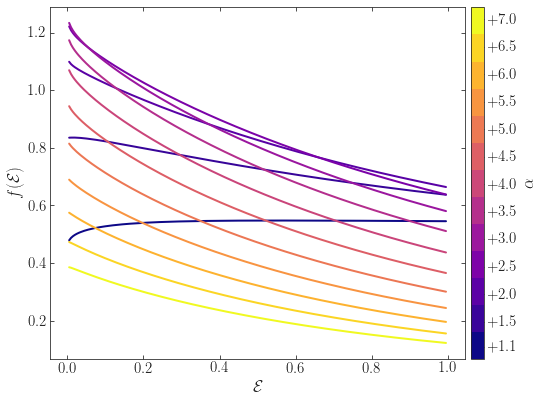

In [500]:
def fE_approx(mE,alpha):
    return mE**(alpha-1.5)*(1.-mE)**(-alpha-1.5)*(-numpy.log(mE)/(1.-mE))**-(0.8*alpha+0.5-1./3./alpha)
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
for ii,alpha in enumerate(alphas):
    plot(mEs,fmEs[ii]/fE_approx(mEs,alpha),lw=2.,
             color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
xlabel(r'$\mathcal{E}$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  



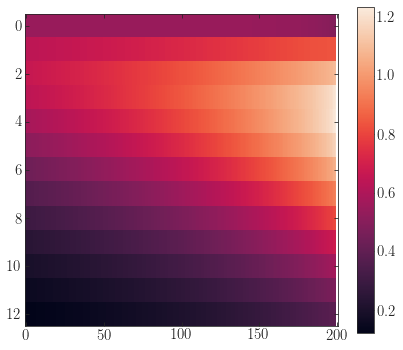

In [501]:
fmEa= numpy.array([fE_approx(mEs,alpha) for alpha in alphas])
imshow(((fmEs/fmEa)),aspect=len(mEs)/float(len(alphas)))
colorbar()

In [502]:
# From https://stackoverflow.com/a/57923405
def polyfit2d(x, y, z, kx=3, ky=3, order=None):
    '''
    Two dimensional polynomial fitting by least squares.
    Fits the functional form f(x,y) = z.

    Notes
    -----
    Resultant fit can be plotted with:
    np.polynomial.polynomial.polygrid2d(x, y, soln.reshape((kx+1, ky+1)))

    Parameters
    ----------
    x, y: array-like, 1d
        x and y coordinates.
    z: np.ndarray, 2d
        Surface to fit.
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
        If None, all coefficients up to maxiumum kx, ky, ie. up to and including x^kx*y^ky, are considered.
        If int, coefficients up to a maximum of kx+ky <= order are considered.

    Returns
    -------
    Return parameters from np.linalg.lstsq.

    soln: np.ndarray
        Array of polynomial coefficients.
    residuals: np.ndarray
    rank: int
    s: np.ndarray

    '''

    # grid coords
    x, y = numpy.meshgrid(x, y)
    # coefficient array, up to x^kx, y^ky
    coeffs = numpy.ones((kx+1, ky+1))

    # solve array
    a = numpy.zeros((coeffs.size, x.size))

    # for each coefficient produce array x^i, y^j
    for index, (i,j) in enumerate(numpy.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = numpy.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        a[index] = arr.ravel()

    # do leastsq fitting and return leastsq result
    return numpy.linalg.lstsq(a.T, numpy.ravel(z), rcond=None)

In [562]:
kx,ky= 6,6
soln,_,_,_= polyfit2d(alphas,mEs[:-1],(fmEs/fmEa)[:,:-1].T,kx=kx,ky=ky,order=kx+ky)

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  



In [563]:
soln

array([-7.26844054e-01,  1.06362396e+00, -1.75869979e+00,  4.55639805e+00,
       -6.85825675e+00,  5.19354499e+00, -1.55552676e+00,  1.27612463e+00,
        2.24853362e+00, -1.44731711e+01,  3.98307662e+01, -5.90478269e+01,
        4.42284837e+01, -1.30886122e+01,  2.37754672e-02, -3.90291032e+00,
        1.87284769e+01, -5.13209145e+01,  7.64318711e+01, -5.74337781e+01,
        1.70399061e+01, -1.79036882e-01,  1.70371314e+00, -7.86543134e+00,
        2.16447231e+01, -3.23320200e+01,  2.43374203e+01, -7.22918283e+00,
        4.72223779e-02, -3.36783389e-01,  1.54657123e+00, -4.27241546e+00,
        6.39419908e+00, -4.81815738e+00,  1.43216507e+00, -5.00762391e-03,
        3.21115195e-02, -1.47714696e-01,  4.09203383e-01, -6.13178737e-01,
        4.62346087e-01, -1.37487311e-01,  1.97284298e-04, -1.20316532e-03,
        5.55092796e-03, -1.54071356e-02,  2.31057825e-02, -1.74295435e-02,
        5.18440643e-03])

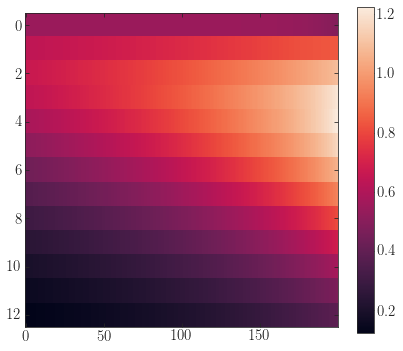

In [564]:
fitted_surf = numpy.polynomial.polynomial.polygrid2d(alphas,mEs[:-1],soln.reshape((kx+1,ky+1)))
imshow(fitted_surf,aspect=len(mEs)/float(len(alphas)))
colorbar()

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  



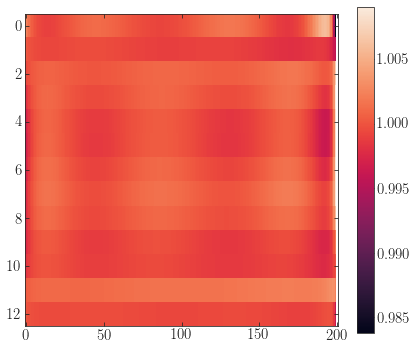

In [565]:
fitted_surf = numpy.polynomial.polynomial.polygrid2d(alphas,mEs,soln.reshape((kx+1,ky+1)))
imshow(fmEs/fmEa/fitted_surf,aspect=len(mEs)/float(len(alphas)))
colorbar()

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """



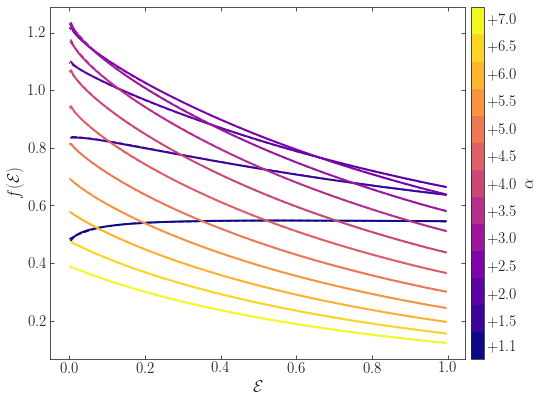

In [566]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
for ii,alpha in enumerate(alphas):
    plot(mEs,fmEs[ii]/fE_approx(mEs,alpha),lw=2.,
             color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
    plot(mEs,numpy.polynomial.polynomial.polyval2d(alpha+numpy.zeros_like(mEs),mEs,soln.reshape((kx+1,ky+1))),
         ls='--',color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
xlabel(r'$\mathcal{E}$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

In [567]:
test_alpha= 4.15
test_pp= PowerSphericalPotential(amp=1.,alpha=test_alpha)
test_edf= eddingtondf(np,denspot=test_pp)

In [568]:
mEs= numpy.linspace(-np(0,0)*0.995,0,201)
test_fmE= 4.*numpy.pi*test_edf.fE(-mEs)

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  



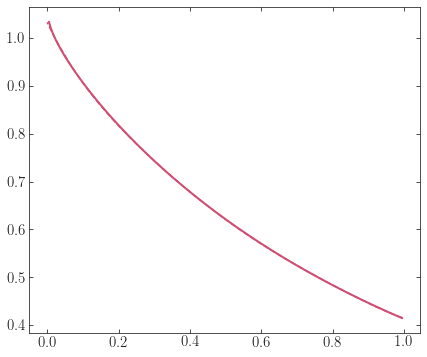

In [569]:
alpha= test_alpha
plot(mEs,test_fmE/fE_approx(mEs,alpha),lw=2.,
             color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
plot(mEs,numpy.polynomial.polynomial.polyval2d(alpha+numpy.zeros_like(mEs),mEs,soln.reshape((kx+1,ky+1))),
         ls='--',color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
#ylim(0.,1.2)

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until



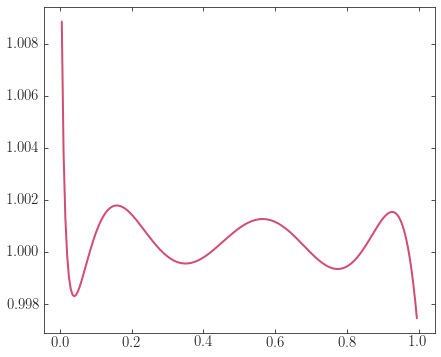

In [570]:
alpha= test_alpha
plot(mEs,test_fmE/fE_approx(mEs,alpha)\
     /numpy.polynomial.polynomial.polyval2d(alpha+numpy.zeros_like(mEs),mEs,soln.reshape((kx+1,ky+1))),
     lw=2.,
             color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys



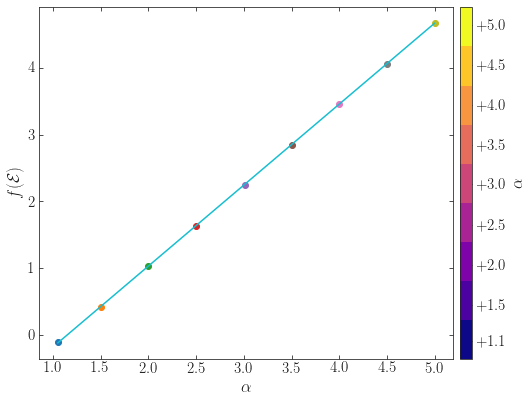

In [135]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
slopes= []
for ii,alpha in enumerate(alphas):
    lmE= numpy.log(mEs)
    lf= numpy.log(fmEs[ii])
    slopes.append((lf[-2]-lf[-15])/(lmE[-2]-lmE[-15]))
    plot([alpha],[slopes[-1]],'o')
    #if not alpha == alphas[5]: continue
    #print(alpha)
    #plot(numpy.log(1.-mEs),numpy.log(fmEs[ii]),lw=2.,color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
coeff= numpy.polyfit(alphas,slopes,deg=1)
plot([alphas[0],alphas[-1]],numpy.polyval(coeff,[alphas[0],alphas[-1]]))
xlabel(r'$1-\mathcal{E}$')
xlabel(r'$\alpha$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  



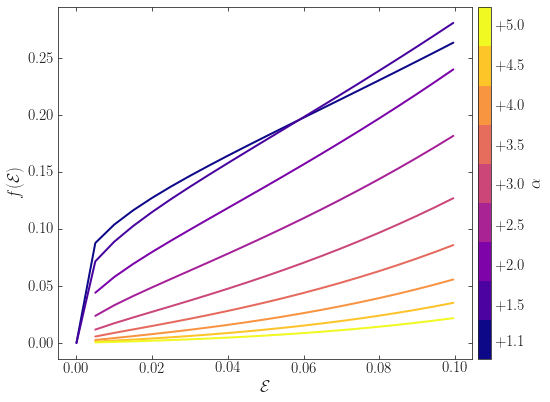

In [182]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
for ii,alpha in enumerate(alphas):
    indx= mEs < 0.1
    plot(mEs[indx],fmEs[ii][indx]/mEs[indx]**(1.*alpha-1.5),
           lw=2.,color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
xlabel(r'$\mathcal{E}$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  



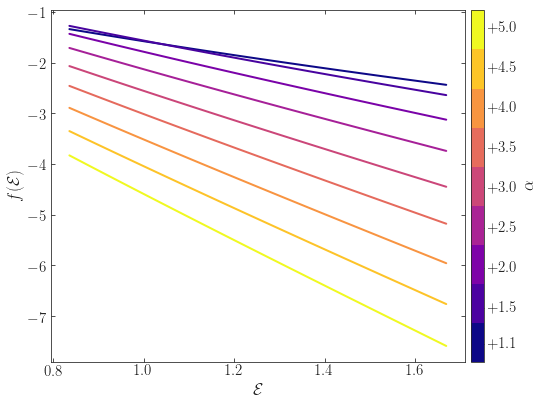

In [155]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
for ii,alpha in enumerate(alphas):
    indx= mEs < 0.1
    plot(numpy.log(-numpy.log(mEs[indx])),numpy.log(fmEs[ii][indx]/mEs[indx]**(1.*alpha-1.5)),
           lw=2.,color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
xlabel(r'$\mathcal{E}$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  



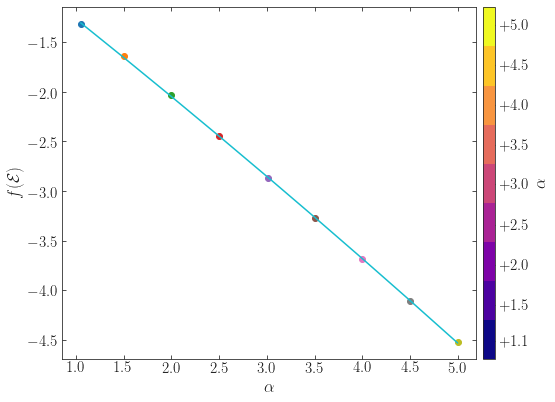

In [161]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
slopes= []
for ii,alpha in enumerate(alphas):
    indx= mEs < 0.1
    llmE= numpy.log(-numpy.log(mEs[indx])) 
    lfE= numpy.log(fmEs[ii][indx]/mEs[indx]**(1.*alpha-1.5))
    slopes.append((lfE[0]-lfE[-2])/(llmE[0]-llmE[-2]))
    plot(alpha,slopes[ii],'o')
coeff= numpy.polyfit(alphas,slopes,deg=2)
plot(alphas,numpy.polyval(coeff,alphas))
xlabel(r'$\alpha$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

In [162]:
coeff

array([-0.0117053 , -0.74535274, -0.51080116])

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  



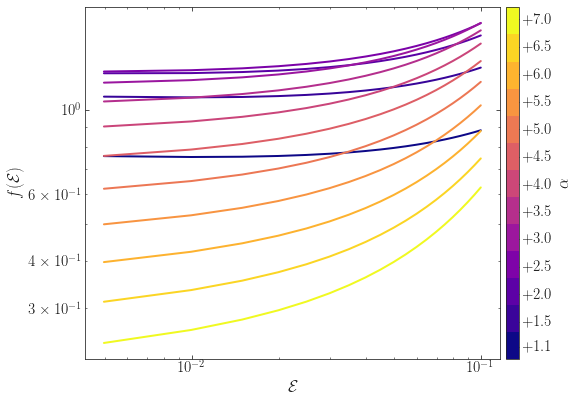

In [370]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
for ii,alpha in enumerate(alphas):
    indx= mEs < 0.1
    loglog(mEs[indx],fmEs[ii][indx]/mEs[indx]**(1.*alpha-1.5)*(-numpy.log(mEs[indx])/(1.-mEs[indx]))**-(-0.75*alpha-0.5),
           lw=2.,color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
xlabel(r'$\mathcal{E}$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """



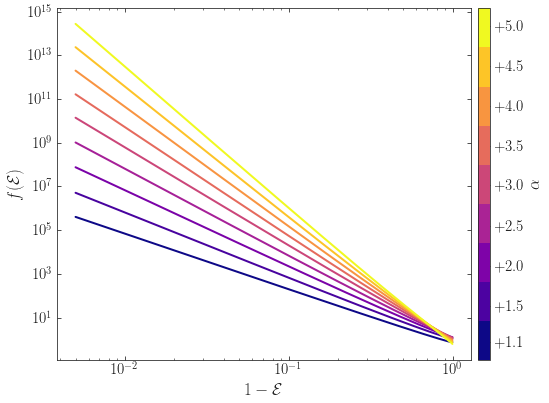

In [166]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
for ii,alpha in enumerate(alphas):
    loglog(1.-mEs,fmEs[ii]/mEs**(1.*alpha-1.5)*(-numpy.log(mEs)/(1.-mEs))**-(-0.75*alpha-0.5),
           lw=2.,color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
xlabel(r'$1-\mathcal{E}$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys

/Users/bovy/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys



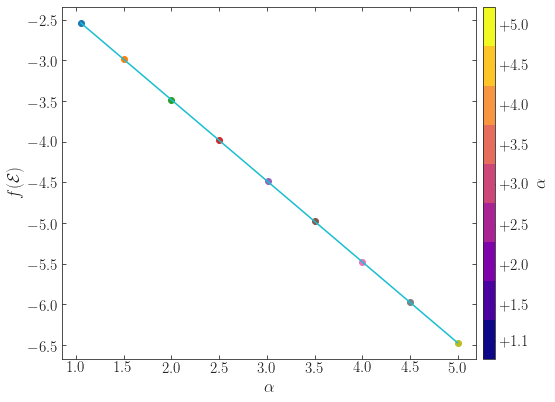

In [172]:
figsize(7,6)
fig= figure()
fig.subplots_adjust(left=0.065,right=0.8875,bottom=0.135,top=0.95,wspace=0.075)
slopes= []
for ii,alpha in enumerate(alphas):
    lmE= numpy.log(1.-mEs)
    lf= numpy.log(fmEs[ii]/mEs**(1.*alpha-1.5)*(-numpy.log(mEs)/(1.-mEs))**-(-0.75*alpha-0.5))
    slopes.append((lf[2]-lf[12])/(lmE[2]-lmE[12]))
    plot([alpha],[slopes[-1]],'o')
    #if not alpha == alphas[5]: continue
    #print(alpha)
    #plot(numpy.log(1.-mEs),numpy.log(fmEs[ii]),lw=2.,color=color_from_colormap(alpha,cmap,alphas[0],alphas[-1]))
coeff= numpy.polyfit(alphas,slopes,deg=1)
plot([alphas[0],alphas[-1]],numpy.polyval(coeff,[alphas[0],alphas[-1]]))
xlabel(r'$1-\mathcal{E}$')
xlabel(r'$\alpha$')
ylabel(r'$f(\mathcal{E})$')
add_discrete_colorbar(alphas[0],alphas[-1],r'$\alpha$',alphas,fmt=r'$%+.1f$');

In [173]:
coeff

array([-0.99497864, -1.49657376])